# Lab 2.8: Tree Based Methods

In this case, we will be conduct a simpler exercise with decision trees using previous implementations. In particular, we will make use of several implemented methods in ML libraries s.a. `sklearn` (_that should be good news for you, doesn't it?_). With this, we will try to explore the main characteristics of decision trees, that you will also have to explore in the more theoretical part of the lab (the other exercise, the one on the pdf).

We will begin, as usual, importing the relevant libraries:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier




We will first apply this to a regression dataset so that you see the way the model is constructed for this case 

## Regression Tree

For starters, let us try out a regression tree. To that end, first load the `Hitters.csv` dataset from the `data` 
folder.

In [9]:
hitters  = pd.read_csv('../data/Hitters.csv', sep=',').dropna()

# Print the columns here to check their names
print(hitters.columns)

Index(['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


For this first case, we will only use the variables `Years` and `Hits` for the tree. Our target variable will be `Salary`. Separate them into `X` and `y`

In [10]:
# Separate the independent variables (X) from the dependent one (y - salary)
 
X = hitters[["Years", "Hits"]]
y = hitters["Salary"]

Construct a _decision tree regressor_ using the `sklearn` function and fit it. To do that, check out the `DecisionTreeRegressor` in sklearn and implement it here.

For reproducibility, fix the `random_state` to `0` and the `max_leaf_nodes` to `3` (make sure you know what this last thing does!)

In [11]:
# Construct the regressor
regressor = DecisionTreeRegressor(random_state=0, max_leaf_nodes=3) # TODO

# Fit it with the .fit method
regressor.fit(X, y)  # TODO

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

Now we will employ some functions engrained in `StringIO` alongside the method `export_graphviz` from the `tree` object in sklearn. This will enable us to visualize the constructed tree.

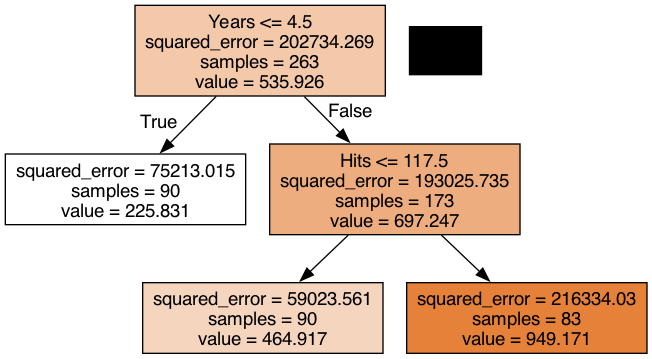

In [12]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data, 
                feature_names=['Years', 'Hits'], 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

> Question: Describe the previous tree. What do you see? Do you think this will work well? Respond **briefly**

No del todo. Aunque reduce algo el error, aún es muy elevado en varias ramas

Now we will plot the decision regions using the information on the cuts. Add lines wherever needed so that you can see the decision boundaries for the regression tree above

/Users/albertomoragarate/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


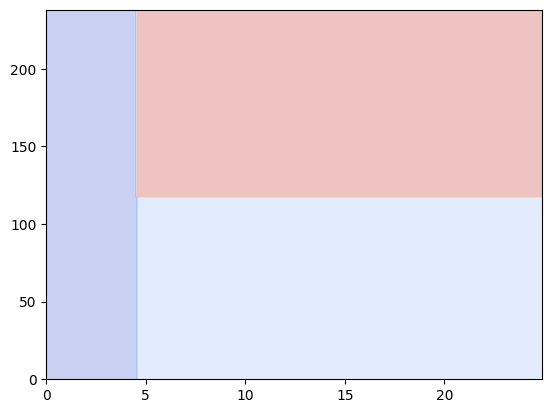

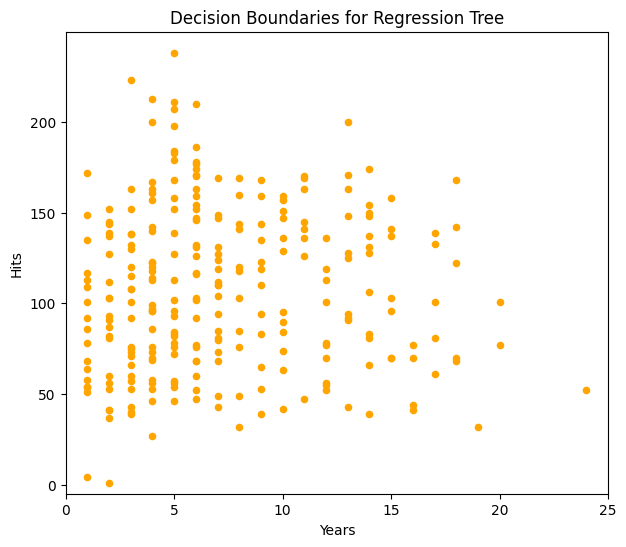

In [13]:
# Crear una malla de puntos para cubrir el espacio de características
x_min, x_max = X['Years'].min() - 1, X['Years'].max() + 1
y_min, y_max = X['Hits'].min() - 1, X['Hits'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 1))

# Predecir valores para cada punto en la malla
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0, 25)
plt.ylim(ymin=-5)
plt.title("Decision Boundaries for Regression Tree")
plt.xlabel("Years")
plt.ylabel("Hits")
plt.show()

## Tree Size

Now, for the previous part we limited the growth of the tree so that we recovered a simple (but easily interpretable) tree. Now we will go all-out: we will construct a more exhaustive tree using different variables. For this particular case, let us use **all variables except** `League`, `Division`, `NewLeague` and `Salary` as independent variables to predict, precisely, the `Salary` value. 

In [18]:
# Construct the input variable dataset
X = hitters.drop(columns=['Player',"League", "Division", "NewLeague", "Salary"])

# Print the column names to check
print(X.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


We will now perform the train/test split, but we will do it so that the proportion of train and test examples is $50\%$ (that is, train and test consist on $50\%$ of the datapoints).

In [19]:
# Perform the train-test split here. Do it so that the  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Now, train the tree to its fullest extent: put no limits on the growth and see what happens. You can re-use some of the previous `graphviz` code to visualize the tree here. Plot the complete tree.

In [20]:
# Train the tree without limits to its growth (random_state = 0)
unlimited_tree_regressor = DecisionTreeRegressor(random_state=0)# TODO 
unlimited_tree_regressor.fit(x_train, y_train) # TOD

DecisionTreeRegressor(random_state=0)

Reuse the code you need to plot the tree here

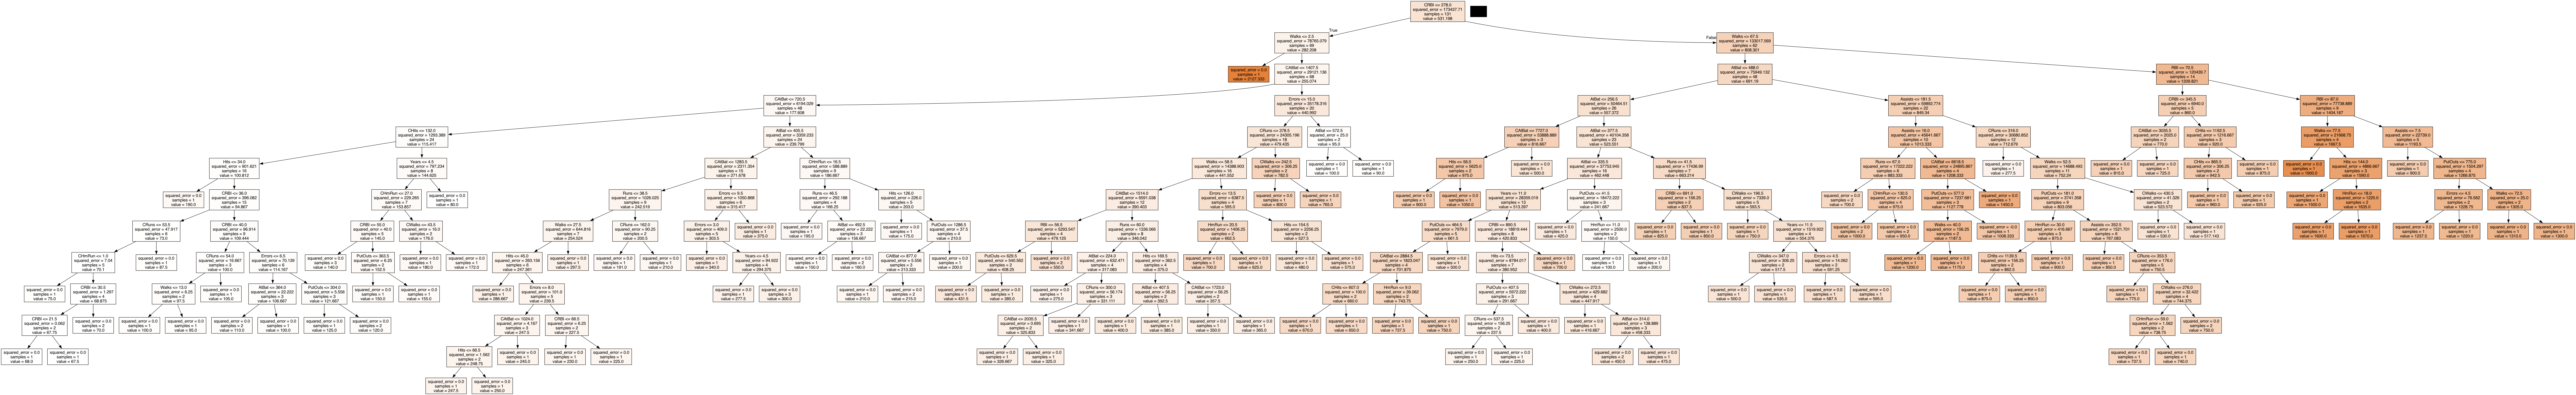

In [21]:
# Visualizar el árbol completo entrenado previamente
dot_data = StringIO()
export_graphviz(unlimited_tree_regressor, 
                out_file=dot_data, 
                feature_names=X.columns, 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


> Question: What do you see? What can you say about this tree? Does it have any important properties?

Este árbol de decisión es muy profundo y extenso, lo que indica que probablemente se ha entrenado sin restricciones de profundidad o número mínimo de muestras por nodo.

Maybe we went _a bit too far_ with the tree... Let's set up some limitations to see everything better. Try setting the `max_features` to 9, and the `max_depth` to 4. (_It is important you understand what these parameters do! Check out the documentation in the [library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)_)

In [22]:
regressor_2 = DecisionTreeRegressor(random_state=0, max_features=9, max_depth=4)
regressor_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=9, random_state=0)

Reuse the code you may need to plot the tree here

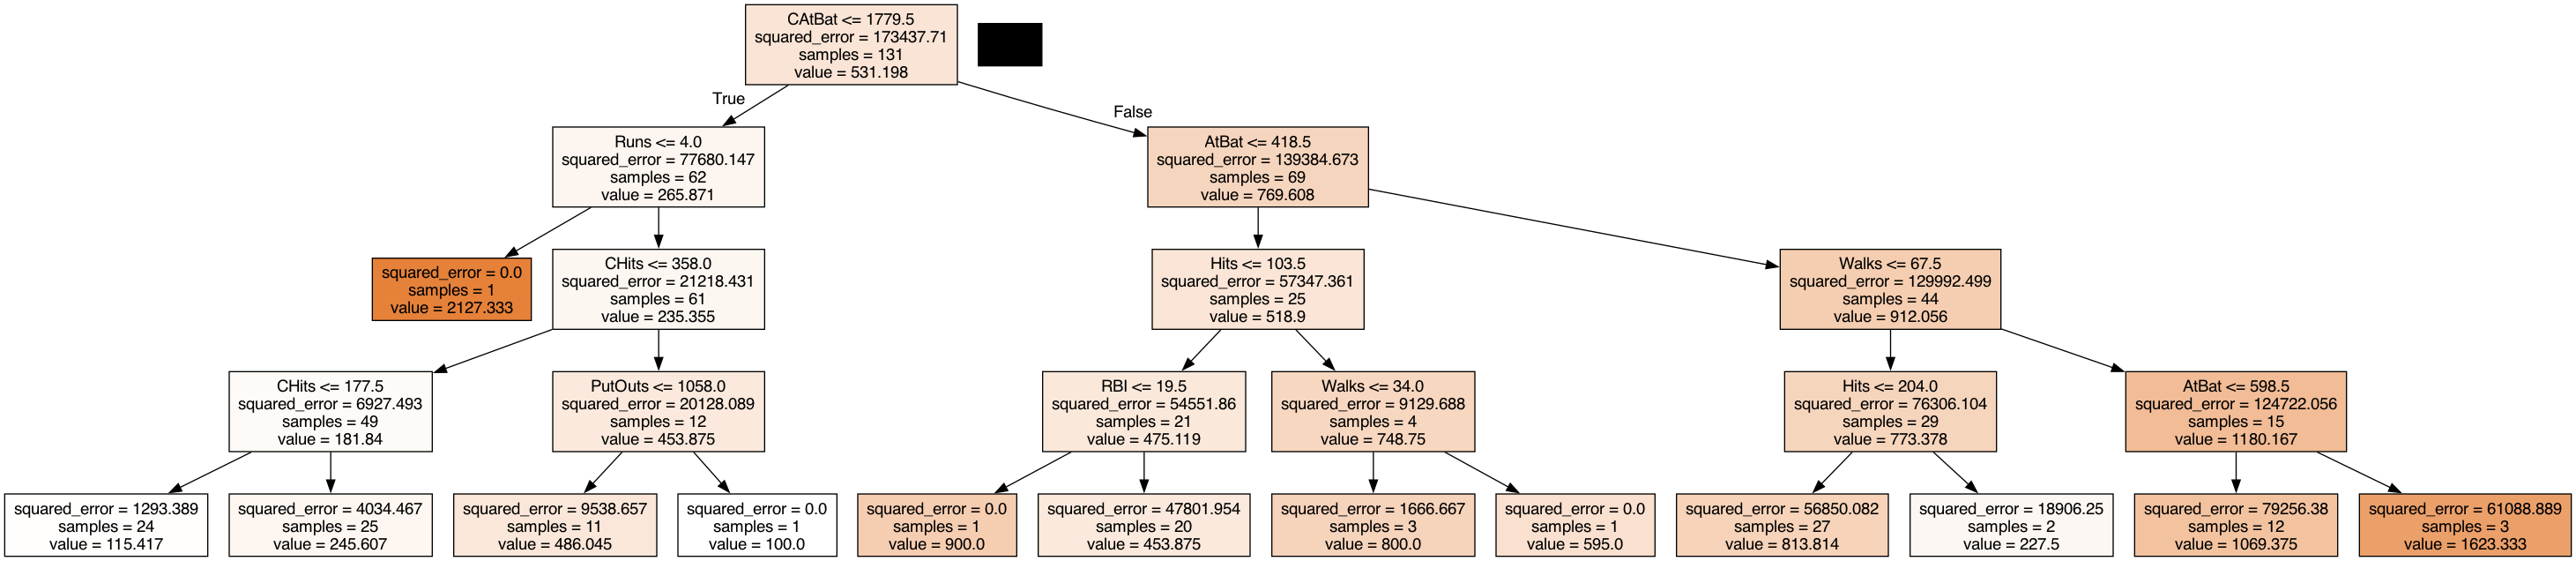

In [23]:
# Visualizar el árbol con las nuevas limitaciones
dot_data = StringIO()
export_graphviz(regressor_2, 
                out_file=dot_data, 
                feature_names=X.columns, 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us see if this tree works well at all... Since we are performing regression, we can obtain the RMSE (we use the Root MSE since it shares the same dimensions of the outputs):

In [25]:
predictions=regressor_2.predict(x_test) # TODO: Obtain the predictions for x_test

# TODO: Print the RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, predictions)) # TODO: Compute the RMSE
print("RMSE: ", rmse)  

RMSE:  369.8405919459622


Now, the question is: how do we know which tree depth to select here? As you may expect, the answer is, as almost always here, performing _cross validation_. In this particular instance we will not conduct exhaustive cross validation. Instead, we will do it in a very simple manner, obtaining *a single tree* for each depth value we want, fitting it to the data and seeing how well does it perform both in train and test  fitted to the data. To do this, do the following:
* Fit a **fixed max depth** (`i`) decision tree regressor using *all `x_train` variables*. Also, *fix the `random state` to 1* for reproducibility.
* Register its train and test RMSEs
* Plot the train and test RMSE curves for each `i` depth  

Make sure that you explore _enough_ depth values. 

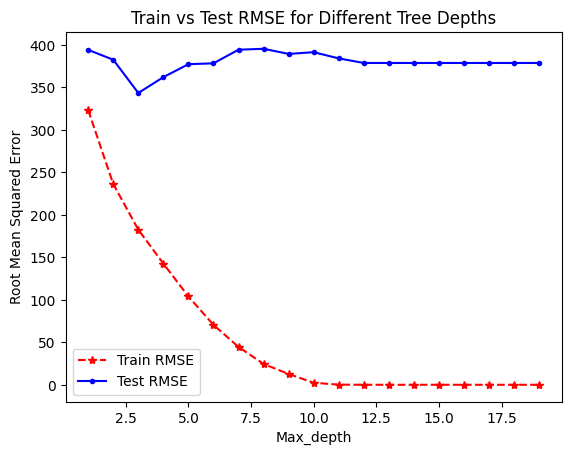

In [26]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1, 20)

for i in tree_size:
    # Train the DecisionTreeRegressor with the current depth
    regressor = DecisionTreeRegressor(max_depth=i, random_state=1)
    regressor.fit(x_train, y_train)
    
    # Compute RMSE for training data
    train_predictions = regressor.predict(x_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_predictions)))
    
    # Compute RMSE for testing data
    test_predictions = regressor.predict(x_test)
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_predictions)))

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--', label='Train RMSE')
plt.plot(tree_size, test_rmse, 'b.-', label='Test RMSE')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.title('Train vs Test RMSE for Different Tree Depths')
plt.show()


> Question: What do you see here? What depth value would you select?

depth 4 o 5




Since we are not really making CV, we do not have multiple values for the train and test RMSE for each tree. Therefore, we *do not* have errorbars in the previous plot. That should raise some suspicions from your part. 

> Question: What happens if we change the `random_state` value? Are the previous results robust?

To answer the previous question you can try out code in the next cell. Feel free to try whatever you think is needed here.

In [27]:
# Cambiar el random_state y observar los resultados
random_states = [0, 42, 100, 1234]
results = []

for state in random_states:
    regressor = DecisionTreeRegressor(max_depth=4, random_state=state, max_features=9)
    regressor.fit(x_train, y_train)
    
    # Obtener predicciones y calcular RMSE
    predictions = regressor.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results.append((state, rmse))

# Imprimir los resultados
for state, rmse in results:
    print(f"Random State: {state}, RMSE: {rmse}")

Random State: 0, RMSE: 369.8405919459622
Random State: 42, RMSE: 346.44474112866794
Random State: 100, RMSE: 343.26639935720266
Random State: 1234, RMSE: 411.4154510000465


In order to get more acquainted with the results, check out what happens if you include less  `x_train` features. To do so, change what you need from the previous block of code and put it in the next block here.
> Question: Do you see any important changes? How do you explain this?  

In [ ]:
# TODO: Your code here!

## Classification Tree

In order to complete this practical exercises with trees, we will also try out some classification trees to later do ensembles. Let us see how this works. 

First, load the `Carseat.csv` dataset from `data` (make sure to remove the NAs, as before)

In [28]:
# Load the dataset (remove the NAs)
carseats = pd.read_csv('../data/Carseat.csv', sep=',').dropna()

Make it so that we have a new binary variable called `high`. This variable should be `1` when `sales` are over 8, and `0` otherwise.

In [29]:
carseats['high'] = (carseats['Sales'] > 8).astype(int)

Convert the remaining variables to make them usable here

The variables `ShelveLoc`, `Urban` and `US` need to be converted to categorical variables to be correctly used. To that end, I suggest you use `pd.factorize` (although feel free to do as you will here...)

In [30]:
# Convertir las variables categóricas a valores numéricos
carseats['ShelveLoc'] = pd.factorize(carseats['ShelveLoc'])[0]
carseats['Urban'] = pd.factorize(carseats['Urban'])[0]
carseats['US'] = pd.factorize(carseats['US'])[0]

Now, we will employ all variables to predict the `high` value (except `Sales` and `high`, for obvious reasons). Note that we have essentially converted a _regression_ problem into a _binary classification_ one.

In [31]:
X = carseats.drop(columns=["Sales", "high"])  # Drop the unwanted columns
y = carseats["high"]  # Select the "high" column

# Perform the train/test split with again 50% data for train and 50% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Construct a decision tree classifier. To control for the depth, we will fix it to a *maximum depth of 6*. Use as impurity criteria the **Gini index**.

In [32]:
carseats_classifier = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

# Train the model with .fit
carseats_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

Plot the tree (again, reuse whatever you may need here)

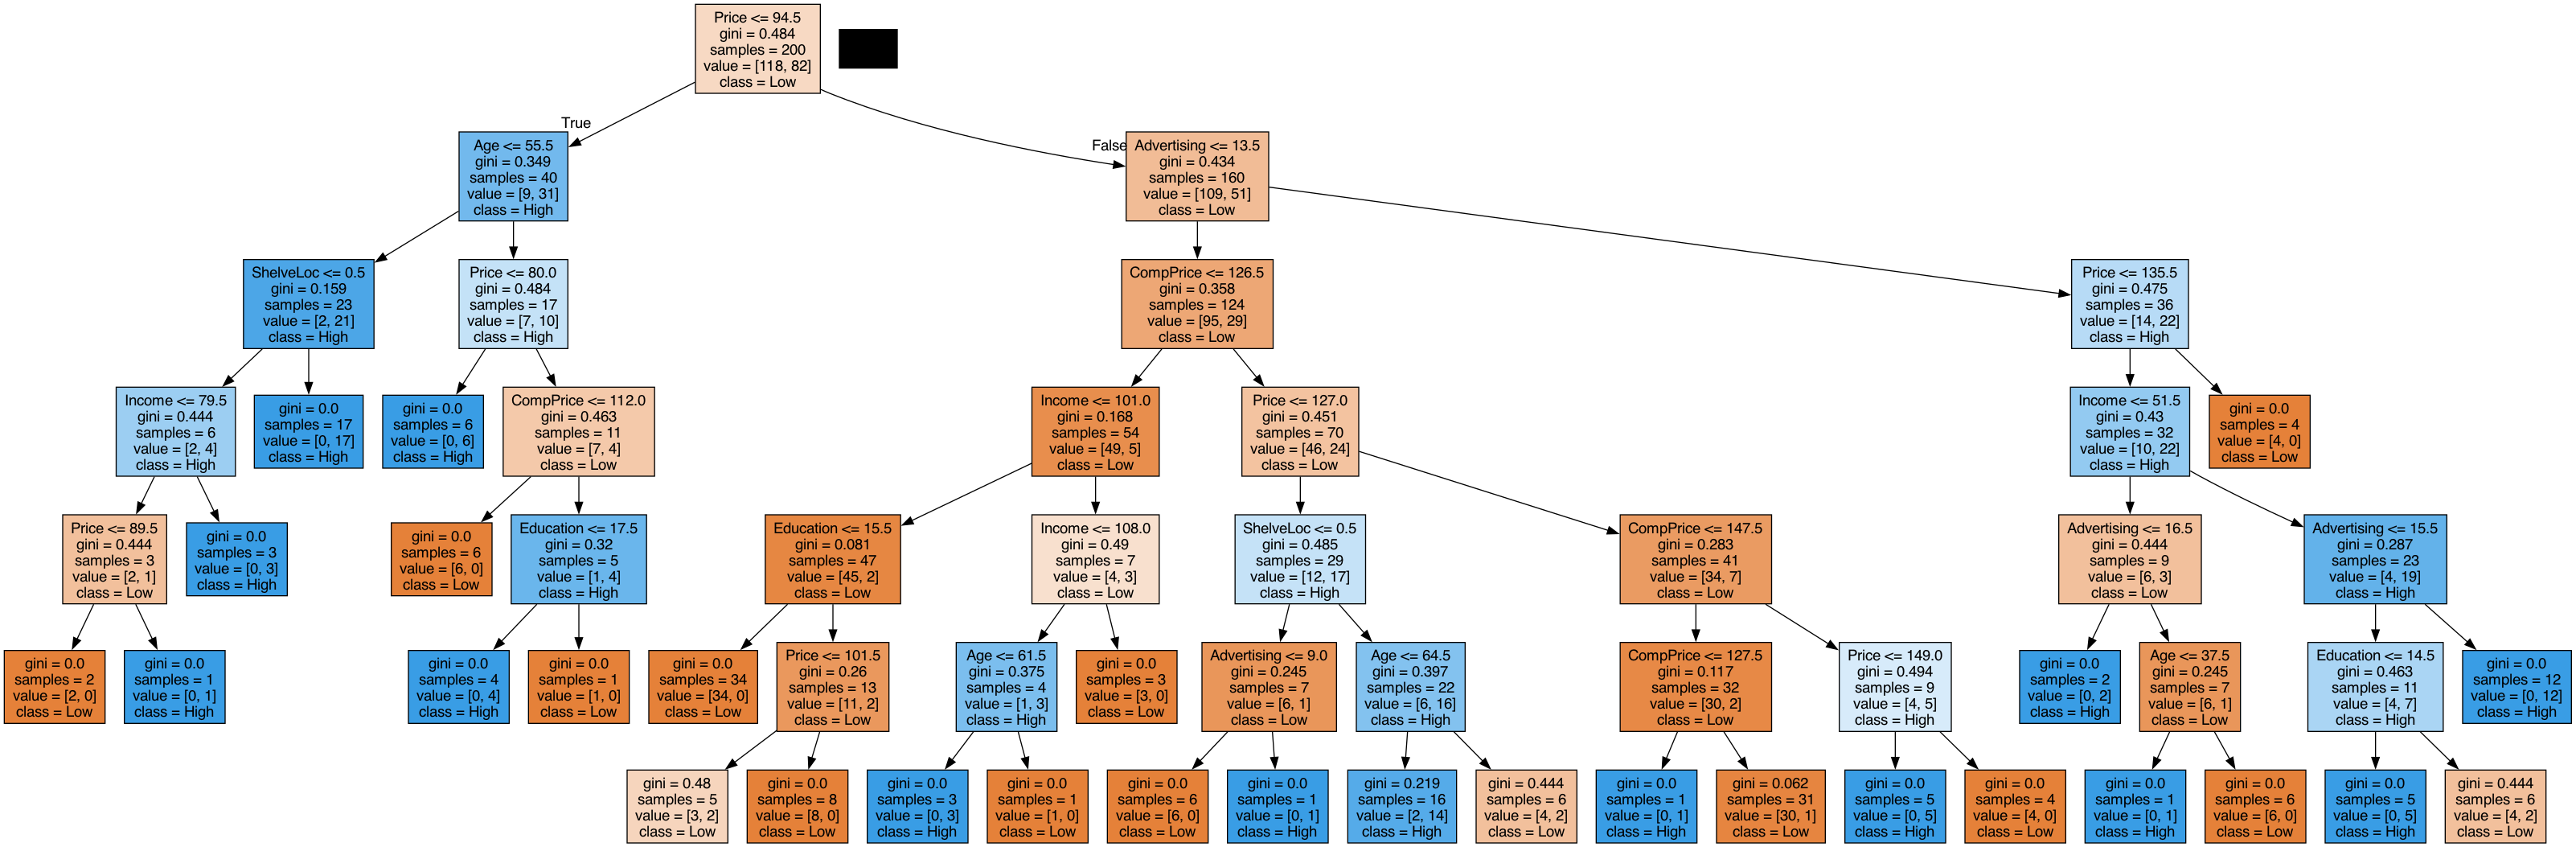

In [33]:
# Visualizar el árbol de clasificación
dot_data = StringIO()
export_graphviz(carseats_classifier, 
                out_file=dot_data, 
                feature_names=X.columns, 
                class_names=['Low', 'High'], 
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us now assess the quality of the tree. To that end, **represent the confusion matrix** for the test data

In [34]:
# Obtener las predicciones para los datos de prueba
y_pred = carseats_classifier.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[101  17]
 [ 32  50]]


> Questions: 
> * What is the **precision** of this tree?
> * Do you consider the dataset balanced?

# Ensembles

Now we will try out some of the ensemble methods from class. Remember there is an stochastic component embedded in these for the most part, so we may not recover exactly the same results twice depending on how you implement things.

## Bagging

The decision tree models mentioned above usually suffers from high variance. **B**ootstrap **agg**regation, or **bagging** usually helps with this issue. To do bagging here, we will do it both by hand and by employing the sklearn function.

First, let's go with the *by-hand* implementation

In [35]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample

# Store the predictions
predictions = []

for _ in range(n_estimators):

    # Create a bootstrap sample
    sample_indices = np.random.choice(X_train.index, size=int(max_samples * len(X_train)), replace=True)
    X_bootstrap = X_train.loc[sample_indices]
    y_bootstrap = y_train.loc[sample_indices]
    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier(random_state=0)  # Impose no restrictions
    decision_tree.fit(X_bootstrap, y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

# Combine predictions
# For classification, you can use majority voting
predictions = np.array(predictions)
majority_vote = mode(predictions, axis=0).mode[0]



/var/folders/rn/3fjmjk5169l07g9j963h7br00000gn/T/ipykernel_32560/3148675874.py:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions, axis=0).mode[0]


Print the confusion matrix

In [36]:
# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, majority_vote)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[102  16]
 [ 32  50]]


Let's see how this is done in `sklearn`... Fit it and show the confusion matrix

In [37]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
bagging.fit(X_train, y_train)

# Obtener las predicciones
bagging_pred = bagging.predict(X_test)

# Imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, bagging_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[97 21]
 [28 54]]


We will use the `sklearn` implementation to study the variable importance. *Make sure you understand how this is done!*

<Axes: >

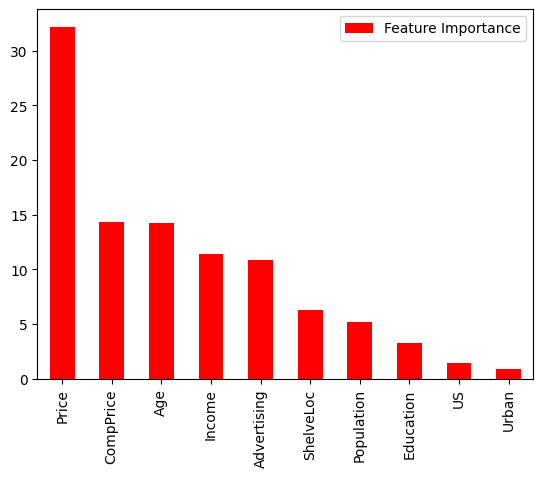

In [38]:
# Calcular la importancia de las características promediando las importancias de los estimadores base
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging.estimators_
], axis=0)

# Crear un DataFrame con las importancias de las características
bagging_featureImportance = pd.DataFrame({'Feature Importance': feature_importances * 100}, index=X.columns)

# Ordenar y graficar las importancias
bagging_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: What do you see here?

## Random Forest

We will also do this in the RF case. First, we will implement it by hand. Feel free to use the previous code and modify it as you may see fit to do RF here!

In [39]:
# RF parameters
n_estimators = 10  # Number of decision trees in the forest
max_features = 0.8  # Proportion of features to consider for each split

# Train decision trees with random feature selection and make predictions
predictions = []
for _ in range(n_estimators):
    # Create a bootstrap sample
    sample_indices = np.random.choice(X_train.index, size=int(max_samples * len(X_train)), replace=True)
    X_bootstrap = X_train.loc[sample_indices]
    y_bootstrap = y_train.loc[sample_indices]
    
    # Select a random subset of features
    n_features = int(max_features * X_train.shape[1])
    selected_features = np.random.choice(X_train.columns, size=n_features, replace=False)
    
    # Train a decision tree classifier on the bootstrap sample with selected features
    decision_tree = DecisionTreeClassifier(random_state=0)
    decision_tree.fit(X_bootstrap[selected_features], y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test[selected_features])
    predictions.append(y_pred)

# Combine predictions using majority voting
predictions = np.array(predictions)
majority_vote = mode(predictions, axis=0).mode[0]

/var/folders/rn/3fjmjk5169l07g9j963h7br00000gn/T/ipykernel_32560/887736647.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions, axis=0).mode[0]


Print the confusion matrix

In [40]:
# Construir el clasificador RF con RandomForestClassifier
rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Predecir los valores de prueba
rf_pred = rf.predict(X_test)

# Obtener la matriz de confusión y mostrarla
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[103  15]
 [ 34  48]]


Let us do it again with `sklearn` so you see the differences... Show the confusion matrix. In this last part there may be some differences with your run, which are due to the randomness of the classifiers constructed. Do not worry too much about it here.

In [41]:
# Construir el clasificador RF con RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_features=0.8)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Predecir los valores de prueba
rf_pred = rf.predict(X_test)

# Obtener la matriz de confusión y mostrarla
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[103  15]
 [ 34  48]]


Using again the `sklearn` implementation, we will study the feature importance

<Axes: >

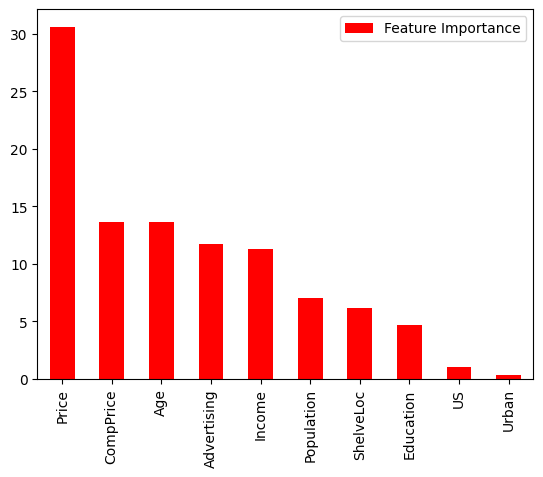

In [42]:
rf_featureImportance = pd.DataFrame({'Feature Importance': rf.feature_importances_ * 100}, index=X.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: Given the models thus far (simple tree, bagging and RF), which one would you choose and why?

## Extra: Boosting

In order to fully complete our review of the ensemble methods from class, we are missing the **Boosting method**. In order to keep matters simple, we will implement it here with `sklearn` so that you get to see what it looks like...

In [46]:
# Entrenar el modelo de Boosting con los datos de entrenamiento
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


# Obtener las predicciones para los datos de prueba
gb_pred = gb.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, gb_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[107  11]
 [ 21  61]]


The results are pretty good! Keep in mind that this is achieved with super weak learners s.a. trees with depth 2. It is quite fast, and super easy to use with `sklearn`. We can also study the variable importance in this case.

<Axes: >

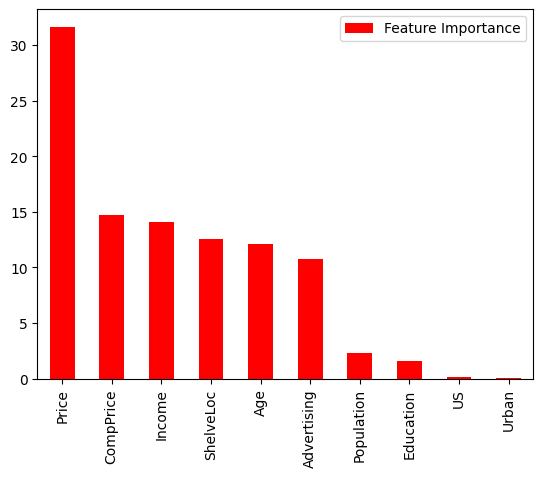

In [47]:
gb_featureimportance= pd.DataFrame({'Feature Importance': gb.feature_importances_*100}, index= X.columns)
gb_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

If you want to see how this can be implemented easily by hand, you can use the following code. We are using an implementation that follows a description of Boosting mode similar to the one given in the ISLR book

In [48]:
# Initialize the parameters
n_estimators = 1000  # Number of decision trees in the ensemble
learning_rate = 0.1  # Learning rate for each decision tree

# Initialize the weights for the training samples
sample_weights = np.ones(len(X_train)) / len(X_train)

# Train decision trees with weighted samples and make predictions
predictions = []
for _ in range(n_estimators):

    # Train a decision tree classifier on the weighted training samples
    decision_tree = DecisionTreeClassifier(max_depth = 2)
    decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

    # Calculate error
    incorrect = (y_pred != y_test).astype(int)
    error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

    # Update sample weights
    alpha = learning_rate * np.log((1 - error) / error)
    sample_weights *= np.exp(alpha * incorrect)

# Combine predictions
# For classification, you can use weighted voting
combined_predictions = np.zeros(len(X_test))
for prediction in predictions:
    combined_predictions += prediction

# Evaluate the performance of the boosting ensemble
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, (combined_predictions > (n_estimators / 2)).astype(int))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display the accuracy
accuracy = np.mean((combined_predictions > (n_estimators / 2)).astype(int) == y_test)
print("Accuracy:", accuracy)

Confusion Matrix:
[[102  16]
 [ 46  36]]
Accuracy: 0.69
